In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import os

print("kk")

kk


In [18]:
images = []
labels = []
lb = LabelEncoder()

for label_path in os.listdir("dataset"):
    
    #load all images
    im = os.listdir(os.path.join("dataset",label_path))
    #select random 1000 images
    im = [random.choice(im) for i in range(1000)]
    for image_path in im:
        #open the images and add rgb
        img = Image.open(os.path.join("dataset",label_path,image_path))
        if img.mode != "RGB":
            img = img.convert('RGB')
        arr = np.array(img)
        resized_img = np.array(Image.fromarray(arr).resize((64,64)))
        images.append(resized_img)
        labels.append(label_path)
        
X = np.array(images)
y = np.array(labels)

#normalizing
X = X/255
y = lb.fit_transform(y)

x_train,x_test_total,y_train,y_test_total = train_test_split(X,y,test_size=0.3,random_state=0)
x_train,x_val,y_train,y_val = train_test_split(x_test_total,y_test_total,test_size=0.25,random_state=20)

print(x_train[0])

[[[0.4        0.40784314 0.40392157]
  [0.40392157 0.41176471 0.40784314]
  [0.40784314 0.41568627 0.41176471]
  ...
  [0.3372549  0.35294118 0.34901961]
  [0.32156863 0.3372549  0.34117647]
  [0.30980392 0.3254902  0.32941176]]

 [[0.40392157 0.41176471 0.40784314]
  [0.41176471 0.41960784 0.41568627]
  [0.41176471 0.41960784 0.41568627]
  ...
  [0.28235294 0.29803922 0.29803922]
  [0.2745098  0.29019608 0.29411765]
  [0.26666667 0.28235294 0.28627451]]

 [[0.40784314 0.41568627 0.41176471]
  [0.41176471 0.41960784 0.41568627]
  [0.41568627 0.41960784 0.41568627]
  ...
  [0.30196078 0.31764706 0.32941176]
  [0.31764706 0.32941176 0.32941176]
  [0.32156863 0.3254902  0.33333333]]

 ...

 [[0.18823529 0.16862745 0.15686275]
  [0.0745098  0.05098039 0.05882353]
  [0.05490196 0.03137255 0.04705882]
  ...
  [0.24705882 0.21960784 0.21960784]
  [0.23921569 0.21176471 0.21176471]
  [0.20392157 0.19607843 0.18823529]]

 [[0.21176471 0.19607843 0.18039216]
  [0.05882353 0.03529412 0.04313725]


In [55]:
print(labels)

['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',

In [53]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(units=500,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=128,activation="relu",kernel_initializer="uniform"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,batch_size=100)

model.save("kinoshan.h5")

Epoch 1/30
5/5 [==============================] - 1s 178ms/step - loss: 1.0433 - accuracy: 0.4800 - val_loss: 0.7829 - val_accuracy: 0.4933
Epoch 2/30
5/5 [==============================] - 1s 156ms/step - loss: 0.7322 - accuracy: 0.4978 - val_loss: 0.7004 - val_accuracy: 0.5067
Epoch 3/30
5/5 [==============================] - 1s 137ms/step - loss: 0.6993 - accuracy: 0.5156 - val_loss: 0.6958 - val_accuracy: 0.5067
Epoch 4/30
5/5 [==============================] - 1s 134ms/step - loss: 0.6912 - accuracy: 0.5244 - val_loss: 0.6903 - val_accuracy: 0.6200
Epoch 5/30
5/5 [==============================] - 1s 134ms/step - loss: 0.6862 - accuracy: 0.6000 - val_loss: 0.6867 - val_accuracy: 0.5867
Epoch 6/30
5/5 [==============================] - 1s 142ms/step - loss: 0.6801 - accuracy: 0.6267 - val_loss: 0.6828 - val_accuracy: 0.5933
Epoch 7/30
5/5 [==============================] - 1s 138ms/step - loss: 0.6689 - accuracy: 0.7022 - val_loss: 0.6756 - val_accuracy: 0.6067
Epoch 8/30
5/5 [====

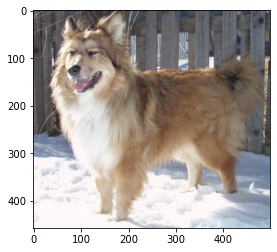

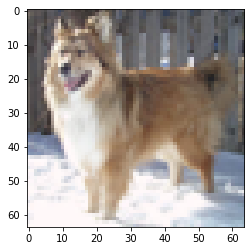

1/1 [==============================] - 0s 50ms/step
[[1.]]


In [63]:
from keras.models import load_model

#test_image = image.load_img("dataset/dogs/dog.4006.jpg")
test_image = Image.open("dataset/dogs/dog.4006.jpg")
plt.imshow(test_image)
plt.show()
test_image = np.array(test_image)
test_image = np.array(Image.fromarray(test_image).resize((64,64)))
plt.imshow(test_image)
plt.show()

test_image = np.expand_dims(test_image,axis=0)
model = load_model("kinoshan.h5")
result = model.predict(test_image)
print(result)